In [221]:
#Importing the modules
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd 
import matplotlib.pyplot as plt

In [222]:
#Loading the data sets
df = pd.read_csv('Datasets/covid_19_clean_data_Daywise(23-march).csv')
Days = np.array(df['Days'])
print("Days",Days)
Confirmed = np.array(df['Confirmed'])
print("Confirmed",Confirmed)
Deaths = np.array(df['Deaths'])
print("Deaths",Deaths)
Recovered = np.array(df['Recovered'])
print("Recovered",Recovered)

Days [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61]
Confirmed [   554    652    939   1432   2113   2922   5573   6161   8229   9920
  12030  16779  19870  23881  27624  30806  34380  37109  40139  42751
  44790  45209  60355  66872  69017  71211  73245  75123  75626  76184
  76808  78564  78950  79553  80398  81380  82738  84104  85987  88339
  90253  92767  95016  97710 101567 105485 109343 113044 118592 125865
 128343 145193 156094 167446 181527 197142 214910 242708 272166 304524
 335955]
Deaths [   17    18    26    42    56    82   131   133   171   213   259   362
   426   492   564   634   719   806   906  1013  1113  1118  1371  1523
  1666  1770  1868  2007  2122  2247  2251  2458  2469  2629  2708  2770
  2814  2872  2940  2995  3079  3153  3243  3336  3446  3541  3781  3966
  4262  4615  4720  5404  5819  6440  7126  7905  8733  9867 112

In [223]:
#Creating randon indices for spliting the data set
random_indices = np.random.permutation(61)
print(random_indices)

#Input train/test feature
Days_train = Days[random_indices[:]]
#Days_test = Days[random_indices[:]]

#Output train/test feature
Confirmed_train = Confirmed[random_indices[:]]
#Confirmed_test = Confirmed[random_indices[58:]]

Deaths_train = Deaths[random_indices[:]]
#Deaths_test = Deaths[random_indices[58:]]

Recovered_train = Recovered[random_indices[:]]
Recovered_test = Recovered[random_indices[58:]]

#Cheaking the lenth of taring sample
print(len(Confirmed_train))

[27 49  9 22 59 56  6 18 15 45 33 30 58  7  0 43 24 37 48 20 25 35  5  4
 51 53 50 19 55 14 54 39 41 57 12 34 47  8 42 26 11 38 46 21 52 10 60 44
 16 13  2  3 17 31 32 36 23 29  1 28 40]
61


In [224]:
#Using Linear Regression 
#Function for training the model with decision tree
#Parameter of the functions are:
    #1. x_train = input feature training set
    #2. y_train = output feature training set
    
    
def model_train(x_train,y_train):
    #fitting the data into the model
    model = linear_model.LinearRegression()#Creating instance of linear model
    #sklearn takes input as matrix so the we have to reshape the matrix into colloum matrix
    x_train_for_fittng = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_fittng = np.matrix(y_train.reshape(len(y_train),1))
    
    #fit the data into the model
    return(model.fit(x_train_for_fittng,y_train_for_fittng))

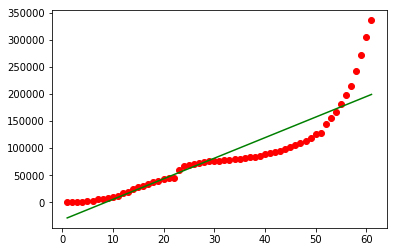

In [225]:
#Calling the Linear regrassing function
model = model_train(Days_train,Confirmed_train)
model_prediction = model.predict(Days.reshape((len(Days),1)))

#Ploring the curve(Red : Traning Data, GREEN : Prediction  )
plt.scatter(Days_train,Confirmed_train,color="red")
plt.plot(Days.reshape((len(Days),1)),model_prediction,color="green")

In [226]:
#Function for Polynomial regrassing function
def poly_regr(X_train,Y_train,degree):
    polynom = PolynomialFeatures(degree=degree)
    X_poly = polynom.fit_transform(X_train.reshape(len(X_train),1))
    polyReg = LinearRegression()
    #Returing the fitted model
    return polyReg.fit(X_poly,Y_train.reshape(len(Y_train),1))   

In [227]:
#calling the plynomial regrassion model for confirm case
polynom = PolynomialFeatures(degree=4)
model = poly_regr(Days_train,Confirmed_train,4)
#Printing the model
print(model)

#Pridiction the mode on traning data
predict = model.predict(polynom.fit_transform(Days_train.reshape(len(Days_train),1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [228]:
'''#Visulazing the predicted model
plt.scatter(Days_train,Confirmed_train,color="red")
plt.scatter(Days_train,predict,color="blue")
plt.show()'''

'#Visulazing the predicted model\nplt.scatter(Days_train,Confirmed_train,color="red")\nplt.scatter(Days_train,predict,color="blue")\nplt.show()'

In [229]:
#Creating Array of custom Days
Days_array = []
#Creating Days Data for further Prediction
for i in range(1,100):
    Days_array.append(i) 
#Converting arary into np array    
Days_predict = np.array(Days_array)
#Predict the model on Future Date 
predict_Confirm = model.predict(polynom.fit_transform(Days_predict.reshape(len(Days_predict),1)))

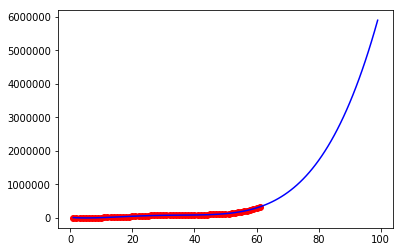

In [230]:
#Ploting the curve(Red: Traning Data, Blue: Future Prediction) for confirm case
plt.scatter(Days_train,Confirmed_train,color="red")
plt.plot(Days_predict,predict_Confirm,color='blue')

In [231]:
#calling the plynomial regrassion model for Death Case
polynom = PolynomialFeatures(degree=4)
model = poly_regr(Days_train,Deaths_train,4)
#Printing the model
print(model)

#Pridiction the mode on traning data
predict = model.predict(polynom.fit_transform(Days_train.reshape(len(Days_train),1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [232]:
#Predict the model on Future Date 
predict_Death = model.predict(polynom.fit_transform(Days_predict.reshape(len(Days_predict),1)))

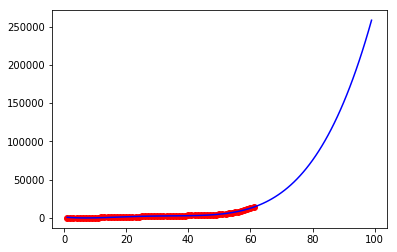

In [233]:
#Ploting the curve(Red: Traning Data, Blue: Future Prediction) for Death case
plt.scatter(Days_train,Deaths_train,color="red")
plt.plot(Days_predict,predict_Death,color='blue')

In [234]:
#calling the plynomial regrassion model for Recovery Case
polynom = PolynomialFeatures(degree=2)
model = poly_regr(Days_train,Recovered_train,2)
#Printing the model
print(model)

#Pridiction the mode on traning data
predict = model.predict(polynom.fit_transform(Days_train.reshape(len(Days_train),1)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [235]:
#Predict the model on Future Date
predict_Recovered = model.predict(polynom.fit_transform(Days_predict.reshape(len(Days_predict),1)))


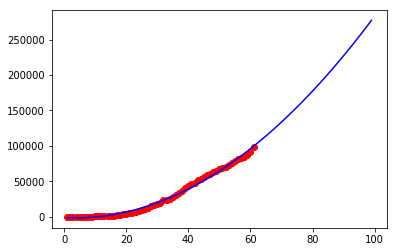

In [236]:
#Ploting the curve(Red: Traning Data, Blue: Future Prediction) for Death case
plt.scatter(Days_train,Recovered_train,color="red")
plt.plot(Days_predict,predict_Recovered,color='blue')